# PART I: Theory Questions

---

## 1. Question

In this question we are asked to sort the emergency calls based on their probability of being an actual emergency. To do that, we have a slick rule called Bayes' Theorem, something derived by our friendly neighborhood statistician, Thomas Bayes. Which states:

$$
P(A|B)
=
\frac{P(B|A) \cdot P(A)}{P(B)}
$$

Where $A$ and $B$ are events. Explaining this theorem in detail:
- $P(A|B)$ is the conditional probability of $A$ given $B$.
- $P(B|A)$ is interpreted in a similar fashion with the former one.
- $P(A) \text{ and } P(B)$ are probabilities of $A \text{ and } B$ without any given conditions.

Or if we were to make a more general definition:

$\text{Let } A_1, A_2,...,A_k$ be a collection of $k$ mutually exclusive and exhaustive events with $prior$ probabilities $P(A_i) \text{ }(i = 1,...,k)$. Then for any other event $B$ for which $P(B) > 0$, the $posterior$ probability of $A_j$ given that $B$ has occured is:


$$
P(A_j|B)
=
\frac{P(B|A_j)\cdot P(A_j)}{\sum_{i=1}^{k} P(B|A_i)\cdot P(A_i)}
\qquad
j = 1, ... , k
$$

Now we can examine all cases one by one.

### 1st Neighborhood

We have these values:
- $P(D) = 0.01 \qquad$ Probability of dangerous fire
- $P(\text{Barbecue Smoke}) = 0.2$ 
- $P(S|D) = 0.8\qquad$ Probability of smoke given that there is a dangerous fire

Using the Bayes' Theorem, we need to solve this:

$$
P(D|S)
=
\frac{P(S|D) \cdot P(D)}{P(S)}
$$

Here we don't know the value of $P(S)$. But we can calculate it with the usage of law of total probability, assuming smoke is caused by only barbecue or a dangerous fire:

$$
P(S) = P(\text{Barbecue Smoke}) + P(S|D) \cdot P(D)
$$

$$
= 0.2 + (0.8 \times 0.01)
$$

$$
= 0.208
$$

Now substituting other values:

$$
P(D|S)
=
\frac{0.8 \times 0.01}{0.208}
$$

$$
\approx  0.0385
$$

We can say for this case, the probability of a dangerous fire is approximately 3.85%.

### 2nd Neighborhood

We have these values:
- $P(D) = 0.35 \qquad$ Probability of dangerous fire
- $P(\text{Factory Smoke}) = 0.1$ 
- $P(S|D) = 0.01\qquad$ Probability of smoke given that there is a dangerous fire

Calculating $P(S)$: (Main Bayes' Theorem is the same, so it won't take place here explicitly.)

$$
P(S) = P(\text{Factory Smoke}) + P(S|D) \cdot P(D)
$$

$$
= 0.1 + (0.35 \times 0.01)
$$

$$
= 0.1035
$$

Now substituting other values:

$$
P(D|S)
=
\frac{0.35 \times 0.01}{0.1035}
$$

$$
\approx  0.0338
$$

### 3rd Neighborhood

We have these values:
- $P(D) = 0.1 \qquad$ Probability of dangerous fire
- $P(\text{Coal Smoke}) = 0.8$ 
- $P(S|D) = 0.3\qquad$ Probability of smoke given that there is a dangerous fire

Calculating $P(S)$:

$$
P(S) = P(\text{Coal Smoke}) + P(S|D) \cdot P(D)
$$

$$
= 0.8 + (0.3 \times 0.1)
$$

$$
= 0.83
$$

Now substituting other values:

$$
P(D|S)
=
\frac{0.3 \times 0.1}{0.83}
$$

$$
\approx  0.0361
$$

Comparing probabilities for all three cases $(P_1, P_2, P_3)$, we can sort them in this way:

$$
P_1 > P_3 > P_2
$$

---

## 2. Question

Let's visualize the boxes first:

| Box Name | Red Count | Blue Count | Pr. of Being Selected |
|----------|-----------|------------|-----------------------|
|   Box 1  |     5     |      3     |          0.4          |
|   Box 2  |     7     |      4     |          0.6          |

### 1st Case

Probability of a blue ball drawn is the sum of separate probabilities of a blue ball drawn from each box. For the first box:

$$
0.4 \times \frac{3}{8} = \frac{1.2}{8}
$$

For the second one:

$$
0.6 \times \frac{4}{11} = \frac{2.4}{11}
$$

Which makes a total of:

$$
\frac{1.2}{8} + \frac{2.4}{11} = \frac{32.4}{88}
$$

### 2nd Case

The probability of second box being selected ($P(S)$), if it is known that a blue ball is drawn ($P(B)$) can be calculated using Bayes' Theorem again:

$$
P(S|B) = \frac{P(B|S) \cdot P(S)}{P(B)}
$$

$P(B)$ was calculated as $\frac{32.4}{88}$ in the previous case. We already know other values too. Substituting:

$$
P(S|B) = \frac{\frac{4}{11} \cdot 0.6}{\frac{32.4}{88}}
$$

$$
= \frac{19.2}{32.4}
$$

---

## 3. Question

- Text classification is the primary application for Naïve Bayes classifier methods. (<span style="color: red;">T</span>) <span style="color: red;">Yes, it is mostly used for spam detection, sentiment analysis etc.</span>
- When an attribute value in the testing record has no example in the training set, the total posterior probability in a Naïve Bayes algorithm will be zero. (<span style="color: red;">T</span>) <span style="color: red;">True, and it's called the Zero Frequency Problem.</span>

---

# PART II: Movie Review Classification System

## Step 1: Importing and Visualizing Data

In [ ]:
%pip install pandas
%pip install seaborn
%pip install matplotlib

In [55]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
TRAIN_PATH = 'aclImdb/train/'
TEST_PATH = 'aclImdb/test/'

First, we should acquire the data. So that we can use it.

In [57]:
def load_data(path: str) -> pd.DataFrame:
    """
    Function to load the data from the aclImdb dataset.

    :param path: Path to the train or test folder
    :return: A pandas DataFrame with the reviews and the sentiment
    """

    data = {'review': [], 'sentiment': []}
    
    for sentiment in ['pos', 'neg']:
        sentiment_path = os.path.join(path, sentiment)
        for filename in os.listdir(sentiment_path):
            if filename.endswith('.txt'):
                with open(os.path.join(sentiment_path, filename), 'r', encoding='utf-8') as file:
                    data['review'].append(file.read())
                    data['sentiment'].append(sentiment)
    return pd.DataFrame(data)

In [58]:
train_data = load_data(TRAIN_PATH)
test_data = load_data(TEST_PATH)

In [59]:
print(train_data.head())
print()
print(test_data.head())

                                              review sentiment
0  Bromwell High is a cartoon comedy. It ran at t...       pos
1  I liked the film. Some of the action scenes we...       pos
2  Somewhat funny and well-paced action thriller ...       pos
3  Just two comments....SEVEN years apart? Hardly...       pos
4  Another Aussie masterpiece, this delves into t...       pos

                                              review sentiment
0  I went and saw this movie last night after bei...       pos
1  Actor turned director Bill Paxton follows up h...       pos
2  As a recreational golfer with some knowledge o...       pos
3  I saw this film in a sneak preview, and it is ...       pos
4  Bill Paxton has taken the true story of the 19...       pos


In [60]:
# an example review
print(train_data.iloc[13]['review'])

I LOVE Jack's jokes like 'The cliché is...' or "Over the top cliché guy, black, oily skin, kinda spooky...". He is just hilarious! Daniel's starting to catch up on him to! Good thing Jack's not on the team anymore (in a way) or else it would have been sarcasm mania!!!!I just love all the plots (season 8, a little less, I have to admit), the characters are great, the actors are great, I'm starting to pick up facial expressions (and more) from Jack, Daniel and Teal'c...It just all theoretically possible and exciting...oops! Their I go again!!! Sorry, I'm also starting to pick up traits from Carter, and all of this is driving my parents NUTZ!!!!!!! Well, to conclude, I think it's good for another three seasons or so, especially if they keep on packing the episodes with all this humor, drama, action and so forth!!!!!!!!!!!!!!!!


Plotting the distribution of the data to better understand it. 

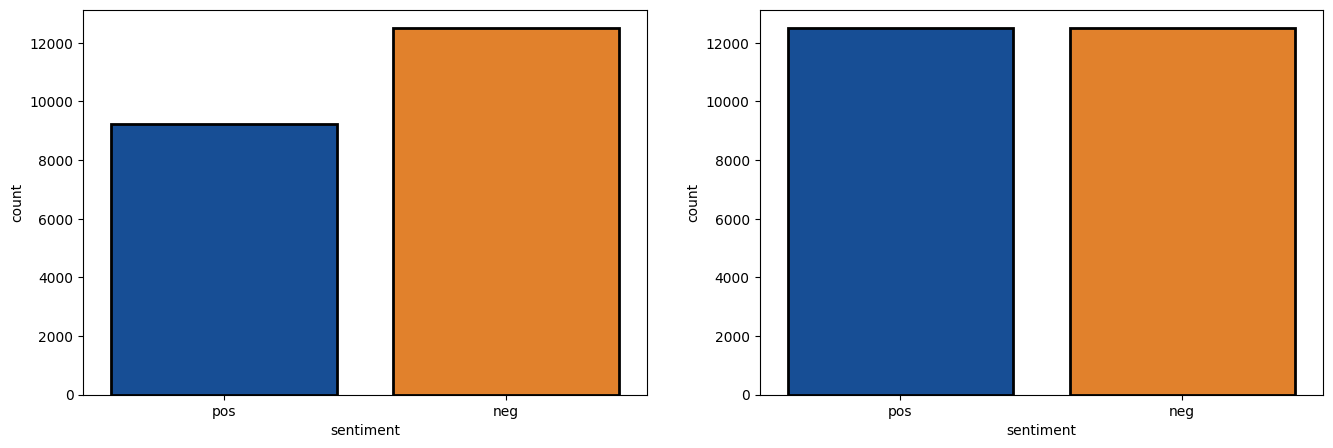

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
colors = ['#024CAA', '#FF7F0E']

sns.countplot(x='sentiment', data=train_data, ax=axes[0], palette=colors, hue='sentiment', legend=False, edgecolor='black', linewidth=2) 
sns.countplot(x='sentiment', data=test_data, ax=axes[1], palette=colors, hue='sentiment', legend=False, edgecolor='black', linewidth=2)
plt.show()

---

## Step 2: BoW, Model and All

In [62]:
from collections import defaultdict
import re

In [63]:
# defining stop words
stop_words = set([
    'the', 'is', 'and', 'in', 'to', 'of', 'a', 'i', 'it', 'that', 'on', 'for', 'with', 'as', 
    'this', 'was', 'but', 'be', 'at', 'by', 'an', 'he', 'she', 'they', 'them', 'we', 'you',
    'are', 'from', 'or', 'not', 'if', 'have', 'has', 'had', 'my', 'your', 'his', 'her', 'its',
    'which', 'so', 'there', 'will', 'would', 'can', 'could', 'our', 'their', 'what', 'when', 
    'where', 'who', 'how', 'just', 'about', 'more', 'up', 'out', 'into', 'no', 'than', 'some', 
    'other', 'only', 'such', 'do', 'over', 'did', 'br' # 'br' is the html tag for line break
])

My simple tokenizer which will pass non-alphabetic characters.

In [64]:
def tokenize(text: str) -> list[str]:
    """
    A simple function to tokenize a text.

    :param text: A text
    :return: A list of words
    """
    text = text.lower()
    # ignoring non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

My logic of BoW. I had so much confusion with it at first, especially after examining the LIBSVM format but I decided on this simple format.

In [65]:
def bow(data: pd.DataFrame, ngram: int=1) -> tuple[dict[str, int], dict[str, int]]:
    """
    Function to create a bag of words from a list of reviews.

    :param data: A pandas DataFrame with the reviews and the sentiment
    :param ngram: The n-gram order (default=1)
    :return: A tuple with the positive and negative dictionaries
    """
    pos_dict = defaultdict(int)
    neg_dict = defaultdict(int)
    
    # over reviews and sentiments
    for _, row in data.iterrows():
        tokens = tokenize(row['review'])
        sentiment = row['sentiment']

        # ngrams = []
        # for i in range(len(words) - ngram + 1):
        #     ngrams.append(tuple(words[i:i + ngram]))
        
        # kinda syntactic sugar to create n-grams
        ngrams = zip(*[tokens[i:] for i in range(ngram)])  

        for ngram_tuple in ngrams:
            ngram_str = ' '.join(ngram_tuple) # join tuple to form the n-gram string
            if sentiment == 'pos':
                pos_dict[ngram_str] += 1
            else:
                neg_dict[ngram_str] += 1

    return dict(pos_dict), dict(neg_dict)

unigram_train_pos, unigram_train_neg = bow(train_data, ngram=1)
bigram_train_pos, bigram_train_neg = bow(train_data, ngram=2)

Now for visualization purposes, we can use WordClouds for BoW's.

In [ ]:
%pip install wordcloud

In [66]:
from wordcloud import WordCloud

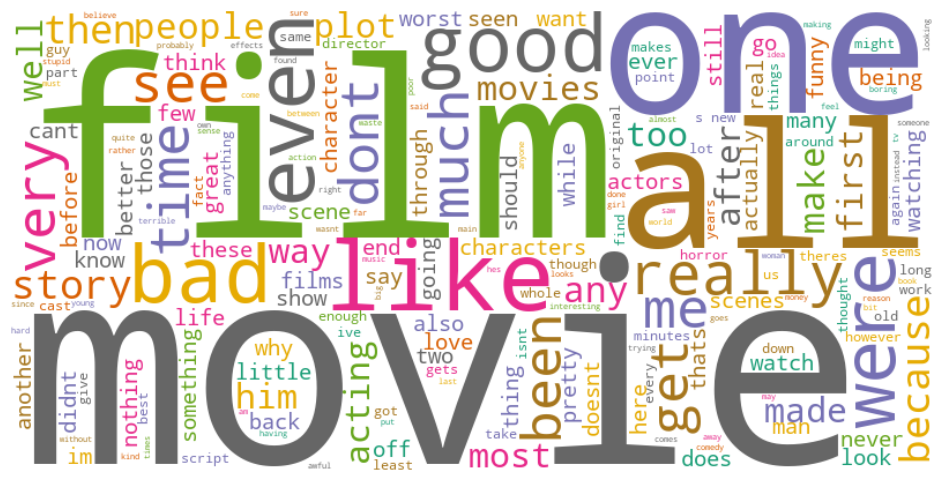

In [67]:
combined_bow = {**unigram_train_pos, **unigram_train_neg}

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Dark2').generate_from_frequencies(combined_bow)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Also we can use bar plots to visualize most used 20 words.

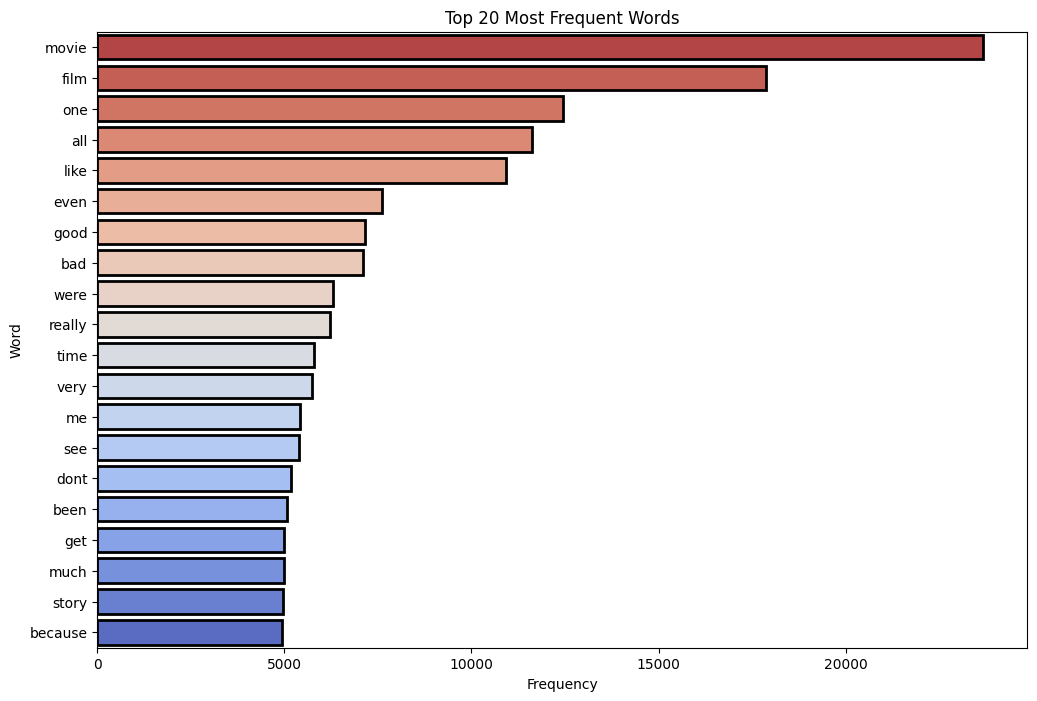

In [68]:
bow_df = pd.DataFrame(list(combined_bow.items()), columns=['word', 'frequency'])

bow_df = bow_df.sort_values(by='frequency', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='frequency', y='word', data=bow_df, palette='coolwarm_r', hue='word', legend=False, edgecolor='black', linewidth=2)
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

And for bigrams:

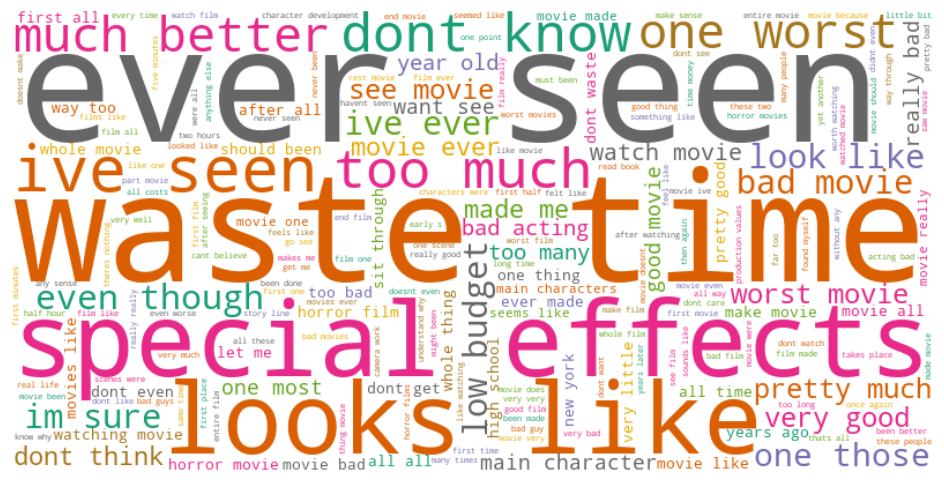

In [69]:
combined_bow = {**bigram_train_pos, **bigram_train_neg}

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Dark2').generate_from_frequencies(combined_bow)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

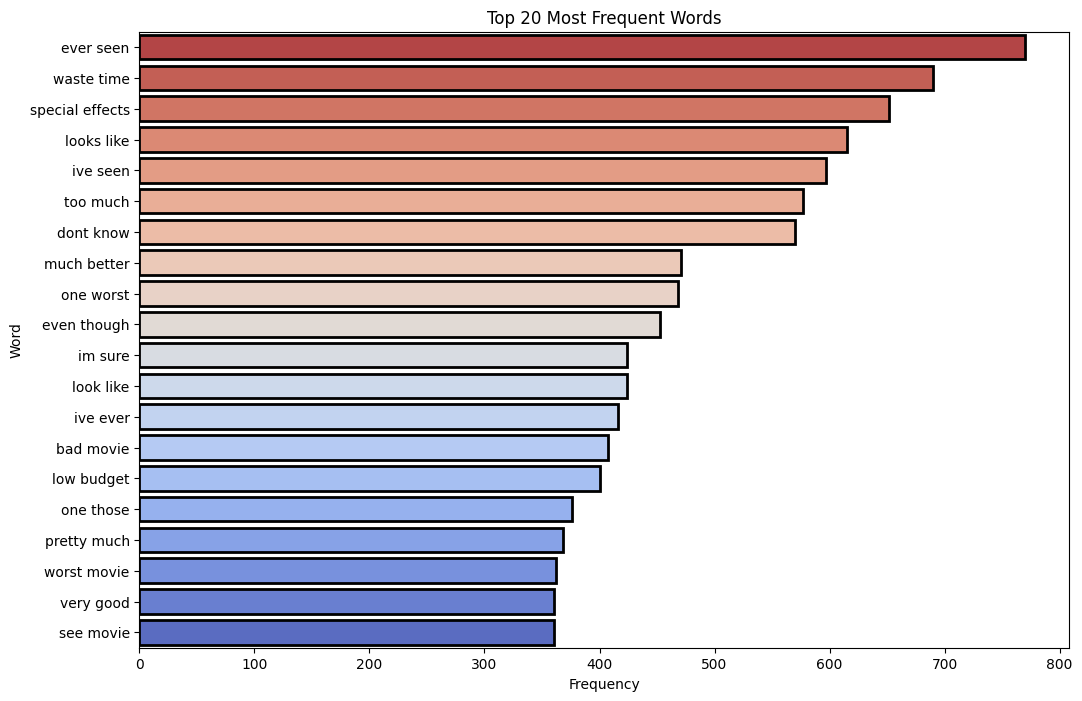

In [70]:
bow_df = pd.DataFrame(list(combined_bow.items()), columns=['word', 'frequency'])

bow_df = bow_df.sort_values(by='frequency', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='frequency', y='word', data=bow_df, palette='coolwarm_r', hue='word', legend=False, edgecolor='black', linewidth=2)
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

While developing the model, this mathematical model was used:

$$
\hat{\theta}_i = \frac{x_i + \alpha}{N + \alpha d} \qquad (i = 1, ..., d)
$$

And the logic is quite simple. To predict a review as positive, it must have a greater probability of being positive than being negative. That's what the Naive Bayes does. In my implementation ngram and alpha are adjustable for experimenting purposes. 

fit() function fits the data as BoW to the model. Actually this was not my original idea but since you asked us to prepare BoWs before the model I came up with this format.

predict() function does the prediction for all reviews and returns predictions.

In [71]:
import math
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [72]:
class NaiveBayesClassifier:
    def __init__(self, ngram: int=1, alpha: int=1):
        self.ngram = ngram
        self.pos_dict = defaultdict(int)
        self.neg_dict = defaultdict(int)
        self.pos_total_count = 0
        self.neg_total_count = 0
        self.vocab = set()
        self.predictions = []
        self.alpha = alpha  
    
    def fit(self, pos_dict: dict[str, int], neg_dict: dict[str, int]) -> None:
        """
        Trains the model with the positive and negative BoW dictionaries.

        :param pos_dict: Dictionary for positive sentiment n-grams
        :param neg_dict: Dictionary for negative sentiment n-grams
        """
        self.pos_dict = pos_dict
        self.neg_dict = neg_dict
        
        self.pos_total_count = sum(self.pos_dict.values())
        self.neg_total_count = sum(self.neg_dict.values())
        self.vocab = set(self.pos_dict.keys()).union(set(self.neg_dict.keys()))
    
    def predict(self, reviews: pd.DataFrame) -> list[str]:
        """
        Predicts sentiment for reviews.

        :param reviews: Reviews
        :return: Predictions
        """
        self.predictions = []

        for _, row  in reviews.iterrows():
            tokens = tokenize(row['review'])
            ngrams = zip(*[tokens[i:] for i in range(self.ngram)])

            pos_log_prob = 0.0
            neg_log_prob = 0.0

            # variables for Laplace (additive) smoothing
            alpha = self.alpha
            v_size = len(self.vocab)  

            for ngram_tuple in ngrams:
                ngram_str = ' '.join(ngram_tuple)

                # Laplace smoothing
                pos_prob = math.log((self.pos_dict.get(ngram_str, 0) + alpha) / (self.pos_total_count + alpha * v_size))
                pos_log_prob += pos_prob # taking advantage of the log properties

                # Laplace smoothing again
                neg_prob = math.log((self.neg_dict.get(ngram_str, 0) + alpha) / (self.neg_total_count + alpha * v_size))
                neg_log_prob += neg_prob # taking advantage of the log properties again

            self.predictions.append('pos' if pos_log_prob > neg_log_prob else 'neg')
    
        return self.predictions

In [73]:
def evaluate(y_true: list[str], y_pred: list[str]) -> None:
    """
    Evaluates the model using accuracy, precision, recall and F1 score.

    :param y_true: True labels
    :param y_pred: Predicted labels
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label='pos')
    recall = recall_score(y_true, y_pred, pos_label='pos')
    f1 = f1_score(y_true, y_pred, pos_label='pos')
    
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

---

## Step 3: Model Testing

First, testing unigram and bigram that we have already prepared.

In [74]:
# unigram
classifier = NaiveBayesClassifier(ngram=1)
classifier.fit(unigram_train_pos, unigram_train_neg)
predictions = classifier.predict(test_data)
evaluate(test_data['sentiment'], predictions)

Accuracy: 0.8143
Precision: 0.8763
Recall: 0.7318
F1 Score: 0.7976


In [75]:
# bigram
classifier = NaiveBayesClassifier(ngram=2)
classifier.fit(bigram_train_pos, bigram_train_neg)
predictions = classifier.predict(test_data)
evaluate(test_data['sentiment'], predictions)

Accuracy: 0.8342
Precision: 0.8307
Recall: 0.8395
F1 Score: 0.8351


Now for experimental purposes, I want to do also 3, 4, and 5-grams.

In [76]:
trigram_train_pos, trigram_train_neg = bow(train_data, ngram=3)
quadgram_train_pos, quadgram_train_neg = bow(train_data, ngram=4)
pentagram_train_pos, pentagram_train_neg = bow(train_data, ngram=5)

In [77]:
# trigram
classifier = NaiveBayesClassifier(ngram=3)
classifier.fit(trigram_train_pos, trigram_train_neg)
predictions = classifier.predict(test_data)
evaluate(test_data['sentiment'], predictions)

Accuracy: 0.5812
Precision: 0.5445
Recall: 0.9944
F1 Score: 0.7037


In [78]:
# quadgram
classifier = NaiveBayesClassifier(ngram=4)
classifier.fit(quadgram_train_pos, quadgram_train_neg)
predictions = classifier.predict(test_data)
evaluate(test_data['sentiment'], predictions)

Accuracy: 0.5136
Precision: 0.5069
Recall: 0.9997
F1 Score: 0.6727


In [79]:
# pentagram
classifier = NaiveBayesClassifier(ngram=5)
classifier.fit(pentagram_train_pos, pentagram_train_neg)
predictions = classifier.predict(test_data)
evaluate(test_data['sentiment'], predictions)

Accuracy: 0.5059
Precision: 0.5030
Recall: 1.0000
F1 Score: 0.6693


Results are quite varying. Now I want to test the effect of the alpha value, so I should choose one gram to move on. Judging from the F1 Scores, bigram looks the best to me. For alpha values, I will be trying 0.5, 2, and 5.

In [80]:
# alpha = 0.5
classifier = NaiveBayesClassifier(ngram=2, alpha=0.5)
classifier.fit(bigram_train_pos, bigram_train_neg)
predictions = classifier.predict(test_data)
evaluate(test_data['sentiment'], predictions)

Accuracy: 0.8279
Precision: 0.7981
Recall: 0.8778
F1 Score: 0.8361


In [81]:
# alpha = 2
classifier = NaiveBayesClassifier(ngram=2, alpha=2)
classifier.fit(bigram_train_pos, bigram_train_neg)
predictions = classifier.predict(test_data)
evaluate(test_data['sentiment'], predictions)

Accuracy: 0.8284
Precision: 0.8741
Recall: 0.7674
F1 Score: 0.8172


In [82]:
# alpha = 5
classifier = NaiveBayesClassifier(ngram=2, alpha=5)
classifier.fit(bigram_train_pos, bigram_train_neg)
predictions = classifier.predict(test_data)
evaluate(test_data['sentiment'], predictions)

Accuracy: 0.7897
Precision: 0.9161
Recall: 0.6378
F1 Score: 0.7521


It looks like a smaller alpha value gave a better result. This might be caused because the effect of smoothing being not really needed for this data and implementation. For testing purposes I will be trying an even lower alpha value:

In [83]:
# alpha = 0.01
classifier = NaiveBayesClassifier(ngram=2, alpha=0.01)
classifier.fit(bigram_train_pos, bigram_train_neg)
predictions = classifier.predict(test_data)
evaluate(test_data['sentiment'], predictions)

Accuracy: 0.8036
Precision: 0.8103
Recall: 0.7926
F1 Score: 0.8014


Until now, the best overall performing model is bigram with alpha=1 in my opinion.

---

## Bonus

In [ ]:
%pip install gensim
%pip install numpy

First, let's try Word2Vec.

In [84]:
from gensim.models import Word2Vec
import numpy as np

In [85]:
train_tokens = []

for _, row in train_data.iterrows():
    tokens = tokenize(row['review'])
    train_tokens.append(tokens)

In [86]:
word2vec = Word2Vec(sentences=train_tokens, vector_size=100, window=5, min_count=1, workers=8)

In [87]:
def get_review_embedding(review: str, word2vec_model: Word2Vec) -> np.ndarray:
    """
    Function to get the review embedding.

    :param review: A review
    :param word2vec_model: A Word2Vec model
    :return: The review embedding
    """
    tokens = tokenize(review)
    embeddings = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

In [88]:
X_train = np.array([get_review_embedding(review, word2vec) for review in train_data['review']])
X_test = np.array([get_review_embedding(review, word2vec) for review in test_data['review']])

In [89]:
y_train = train_data['sentiment']
y_test = test_data['sentiment']

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
evaluate(y_test, y_pred)

Accuracy: 0.7988
Precision: 0.8312
Recall: 0.7498
F1 Score: 0.7884


Now let's play around with the parameters a bit. Let's try a larger vector size.

In [92]:
word2vec = Word2Vec(sentences=train_tokens, vector_size=300, window=5, min_count=1, workers=8)

In [93]:
X_train = np.array([get_review_embedding(review, word2vec) for review in train_data['review']])
X_test = np.array([get_review_embedding(review, word2vec) for review in test_data['review']])

In [94]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
evaluate(y_test, y_pred)

Accuracy: 0.8035
Precision: 0.8344
Recall: 0.7573
F1 Score: 0.7940


Hmm, we get slightly better results. Now let's change the window parameter. From what I learned, this window parameter is a range value for the distance between the words for each word. Let's decrease it a bit.

In [95]:
word2vec = Word2Vec(sentences=train_tokens, vector_size=300, window=3, min_count=1, workers=8)

In [96]:
X_train = np.array([get_review_embedding(review, word2vec) for review in train_data['review']])
X_test = np.array([get_review_embedding(review, word2vec) for review in test_data['review']])

In [97]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
evaluate(y_test, y_pred)

Accuracy: 0.8025
Precision: 0.8348
Recall: 0.7542
F1 Score: 0.7925


Maybe we should increase it a bit?

In [98]:
word2vec = Word2Vec(sentences=train_tokens, vector_size=300, window=7, min_count=1, workers=8)

In [99]:
X_train = np.array([get_review_embedding(review, word2vec) for review in train_data['review']])
X_test = np.array([get_review_embedding(review, word2vec) for review in test_data['review']])

In [100]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
evaluate(y_test, y_pred)

Accuracy: 0.8069
Precision: 0.8364
Recall: 0.7630
F1 Score: 0.7980


Hmm, let's try an extreme value just for kicks, maybe something unexpected will happen?

In [101]:
word2vec = Word2Vec(sentences=train_tokens, vector_size=300, window=12, min_count=1, workers=8)

In [102]:
X_train = np.array([get_review_embedding(review, word2vec) for review in train_data['review']])
X_test = np.array([get_review_embedding(review, word2vec) for review in test_data['review']])

In [103]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
evaluate(y_test, y_pred)

Accuracy: 0.8099
Precision: 0.8394
Recall: 0.7665
F1 Score: 0.8013


Mixed comments :) Now let's use a bigger variety of parameters. Window size 5 will be chosen from now on.

In [104]:
word2vec_model = Word2Vec(sentences=train_tokens, vector_size=300, window=5, min_count=3, workers=8, sg=1, epochs=10)

In [105]:
X_train = np.array([get_review_embedding(review, word2vec) for review in train_data['review']])
X_test = np.array([get_review_embedding(review, word2vec) for review in test_data['review']])

In [106]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
evaluate(y_test, y_pred)

Accuracy: 0.8099
Precision: 0.8394
Recall: 0.7665
F1 Score: 0.8013


So far we got the best performance from the most unexpected model (the one I used an "extreme" window value). So, let's just squeeze it really good :)

In [107]:
word2vec = Word2Vec(sentences=train_tokens, vector_size=300, window=20, min_count=1, workers=8)

In [108]:
X_train = np.array([get_review_embedding(review, word2vec) for review in train_data['review']])
X_test = np.array([get_review_embedding(review, word2vec) for review in test_data['review']])

In [109]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
evaluate(y_test, y_pred)

Accuracy: 0.8087
Precision: 0.8384
Recall: 0.7648
F1 Score: 0.7999


Looks like it just keeps getting better as the window increases. I can think of only one explanation for this matter: Reviews are generally quite lengthy and the sentiments may be spanned on multiple words, causing a long window. So, let's test it with an even greater value.

In [110]:
word2vec = Word2Vec(sentences=train_tokens, vector_size=300, window=50, min_count=1, workers=8)

In [111]:
X_train = np.array([get_review_embedding(review, word2vec) for review in train_data['review']])
X_test = np.array([get_review_embedding(review, word2vec) for review in test_data['review']])

In [112]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
evaluate(y_test, y_pred)

Accuracy: 0.8138
Precision: 0.8432
Recall: 0.7711
F1 Score: 0.8055


I'm no expert but I see this as an absolute win!

### Now let's use NLTK and see what's the deal with this magical toolkit.

In [ ]:
%pip install nltk

In [113]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

In [114]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bora\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bora\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [115]:
nltk_stop_words = set(stopwords.words('english'))

Now some small changes must be made on the tokenizer, BoW and Classifier to use them with NLTK.

In [116]:
def tokenize_nltk(text: str) -> list[str]:
    """
    Tokenizes text using NLTK, converts to lowercase, removes non-alphabetic characters,
    and removes stop words.

    :param text: A text string to be tokenized
    :return: A list of tokens
    """
    text = text.lower()
    # NLTK tokenizer
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in nltk_stop_words]
    return tokens

In [117]:
def bow_nltk(data: pd.DataFrame, ngram: int=1) -> tuple[dict[str, int], dict[str, int]]:
    """
    Function to create a bag of words from a list of reviews using NLTK.

    :param data: A pandas DataFrame with the reviews and the sentiment
    :param ngram: The n-gram order (default=1)
    :return: A tuple with the positive and negative dictionaries
    """
    pos_dict = defaultdict(int)
    neg_dict = defaultdict(int)
    
    # over reviews and sentiments
    for _, row in data.iterrows():
        tokens = tokenize_nltk(row['review']) # using NLTK tokenizer
        sentiment = row['sentiment']
        
        ngram_list = ngrams(tokens, ngram)

        for ngram_tuple in ngram_list:
            ngram_str = ' '.join(ngram_tuple) # join tuple to form the n-gram string
            if sentiment == 'pos':
                pos_dict[ngram_str] += 1
            else:
                neg_dict[ngram_str] += 1

    return dict(pos_dict), dict(neg_dict)

In [118]:
class NaiveBayesClassifierNLTK:
    def __init__(self, ngram: int=1, alpha: int=1):
        self.ngram = ngram
        self.pos_dict = defaultdict(int)
        self.neg_dict = defaultdict(int)
        self.pos_total_count = 0
        self.neg_total_count = 0
        self.vocab = set()
        self.predictions = []
        self.alpha = alpha  
    
    def fit(self, pos_dict: dict[str, int], neg_dict: dict[str, int]):
        """
        Trains the model with the positive and negative BoW dictionaries.

        :param pos_dict: Dictionary for positive sentiment n-grams
        :param neg_dict: Dictionary for negative sentiment n-grams
        """
        self.pos_dict = pos_dict
        self.neg_dict = neg_dict
        
        self.pos_total_count = sum(self.pos_dict.values())
        self.neg_total_count = sum(self.neg_dict.values())
        self.vocab = set(self.pos_dict.keys()).union(set(self.neg_dict.keys()))
    
    def predict(self, reviews: pd.DataFrame) -> list[str]:
        """
        Predicts sentiment for reviews.

        :param reviews: Reviews
        :return: Predictions
        """
        self.predictions = []  
        
        for _, row  in reviews.iterrows():
            tokens = tokenize(row['review'])
            ngrams = zip(*[tokens[i:] for i in range(self.ngram)])

            pos_log_prob = 0.0
            neg_log_prob = 0.0

            # variables for Laplace (additive) smoothing
            alpha = self.alpha
            v_size = len(self.vocab)  

            for ngram_tuple in ngrams:
                ngram_str = ' '.join(ngram_tuple)

                # Laplace smoothing
                pos_prob = math.log((self.pos_dict.get(ngram_str, 0) + alpha) / (self.pos_total_count + alpha * v_size))
                pos_log_prob += pos_prob # taking advantage of the log properties

                # Laplace smoothing again
                neg_prob = math.log((self.neg_dict.get(ngram_str, 0) + alpha) / (self.neg_total_count + alpha * v_size))
                neg_log_prob += neg_prob # taking advantage of the log properties again

            self.predictions.append('pos' if pos_log_prob > neg_log_prob else 'neg')
    
        return self.predictions

In [119]:
unigram_train_pos_nltk, unigram_train_neg_nltk = bow_nltk(train_data, ngram=1)
bigram_train_pos_nltk, bigram_train_neg_nltk = bow_nltk(train_data, ngram=2)

Now let's see how good is that NLTK, shall we?

In [120]:
# unigram
classifier = NaiveBayesClassifierNLTK(ngram=1)
classifier.fit(unigram_train_pos_nltk, unigram_train_neg_nltk)
predictions = classifier.predict(test_data)
evaluate(test_data['sentiment'], predictions)

Accuracy: 0.8242
Precision: 0.8231
Recall: 0.8258
F1 Score: 0.8245


In [121]:
# bigram
classifier = NaiveBayesClassifierNLTK(ngram=2)
classifier.fit(bigram_train_pos_nltk, bigram_train_neg_nltk)
predictions = classifier.predict(test_data)
evaluate(test_data['sentiment'], predictions)

Accuracy: 0.7991
Precision: 0.7437
Recall: 0.9127
F1 Score: 0.8196


And now let's try with a smaller alpha.

In [122]:
# alpha = 0.5
classifier = NaiveBayesClassifierNLTK(ngram=1, alpha=0.5)
classifier.fit(unigram_train_pos_nltk, unigram_train_neg_nltk)
predictions = classifier.predict(test_data)
evaluate(test_data['sentiment'], predictions)

Accuracy: 0.8210
Precision: 0.8190
Recall: 0.8241
F1 Score: 0.8215


Maybe, an even smaller one?

In [123]:
# alpha = 0.1
classifier = NaiveBayesClassifierNLTK(ngram=1, alpha=0.1)
classifier.fit(unigram_train_pos_nltk, unigram_train_neg_nltk)
predictions = classifier.predict(test_data)
evaluate(test_data['sentiment'], predictions)

Accuracy: 0.8103
Precision: 0.8166
Recall: 0.8003
F1 Score: 0.8084


OK maybe not :)

---

## Comparing best scores of all approaches

|               |                     From Scratch                       |                             Word2Vec + LogReg                           |       NLTK       |
|---------------|--------------------------------------------------------|-------------------------------------------------------------------------|------------------|
|   **Params**  |                     Bigram, alpha=1                    |                   Vector Size=300, Window=50, Min Count=1               | Unigram, alpha=1 | 
|  **Accuracy** |      <span style="color: green;">**0.8342**</span>     |                                  0.8138                                 |       0.8242     |
| **Precision** |                          0.8307                        |                 <span style="color: green;">**0.8432**</span>           |       0.8231     |
|   **Recall**  |      <span style="color: green;">**0.8395**</span>     |                                  0.7711                                 |       0.8258     |
|  **F1 Score** |      <span style="color: green;">**0.8351**</span>     |                                  0.8055                                 |       0.8245     |

Overall, my implementation from scratch looks like the best performing one. It may be caused by some limitations, actually, in my opinion. For example, I'm pretty sure that my stopwords are incredibly narrower than NLTK's. Actually when I was deciding on my stopwords I did a bit of research to find a pre-defined stopwords list that is hopefully closer to NLTK's. But inspecting that list further, I realized it consisted some words like "good", which actually could hold sentiment for movie reviews. So I just sampled it to a certain degree which felt enough, filtering some words that I thought to be meaningful. So I guess my stopwords are less biased, that might be the reason for these results.